<a href="https://colab.research.google.com/github/EsraMutlugun/EsraMutlugun/blob/main/Data_SciencePROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Santa Clara County Profile***



> Questions


1.   What is the birth rates by Cities?
2.   What is the Cancer and Heart death rates by Cities?
3.   What is the life expectancy by Cities?
4.   What is the correlation between median income & unemployment numbers?
5.   Is there any corelation between education and unemployment numbers?
6.   Is there any relation between crime reports and tobacco and alcohol stores density?
7.   What is the distribution by Race/Ethnicity in Cities?
8.   What is the distribution for senior ages and young ages population?
9.   What is the commute habits in Santa Clara county? Which cities have more traffic injuries?
10.  Which ethnicities speak their languages at home?







## ***Dataset from Santa Clara County Public Health Department***

https://data-sccphd.opendata.arcgis.com/

In [179]:
# import libraries and  CSV file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from google.colab import files
from glob import glob
uploaded = files.upload()


Saving Health_Status_Statistics_-_Zip_Code.csv to Health_Status_Statistics_-_Zip_Code (2).csv


In [173]:
df1 = pd.read_csv(io.BytesIO(uploaded['Healthy_&_Safe_Environment_Statistics_-_Zip_Code.csv']))

In [176]:
df2 = pd.read_csv(io.BytesIO(uploaded['Economics_&_Education_Statistics_-_Zip_Code.csv']))

In [178]:
df3= pd.read_csv(io.BytesIO(uploaded['Demographic_Statistics_-_Zip_Code.csv']))

In [180]:
df4=pd.read_csv(io.BytesIO(uploaded['Health_Status_Statistics_-_Zip_Code.csv']))

In [181]:
df1.columns


Index(['OBJECTID', 'zip_code', 'coll_ped', 'coll_bic', 'coll_mv',
       'commute_sing', 'commute_cp', 'commute_pt', 'commute_other',
       'commute_gte30min', 'grocery_dist', 'farmmkt_dist', 'fastfood_dens',
       'fruit', 'vegetable', 'fruit_local', 'rent_mt30_hh', 'multi_unit_hh',
       'phys_active', 'park_dist', 'tobacco_dens', 'crime_1mi_ave',
       'alchohol_dens', 'ozone', 'pm25', 'dental_ins', 'flushot', 'bingedrink',
       'calfresh_hh', 'fastfood', 'food_assist', 'overcrowded_hh',
       'crime_issue', 'gun_home', 'dom_violent', 'health_insured',
       'Shape__Area', 'Shape__Length'],
      dtype='object')

In [182]:
df2.columns


Index(['OBJECTID', 'zip_code', 'medhhinc', 'unemp', 'famfpl185',
       'chld_3_4_preschl', 'ed_lt_hs', 'ed_hsgrad', 'ed_partcoll',
       'ed_collgrad', 'ed_hs', 'chldfpl185', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [183]:
df3.columns


Index(['OBJECTID', 'zip_code', 'totpop', 'popaf', 'popapi', 'poplat', 'popwht',
       'popfgnborn', 'otherlang', 'hh_sp', 'hh_ch', 'hh_ave', 'age0_5',
       'age6_11', 'age12_17', 'age18_24', 'age25_34', 'age35_44', 'age45_54',
       'age55_64', 'age65plus', 'age0_17', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [184]:
df4.columns

Index(['OBJECTID', 'zip_code', 'life', 'cancer_mort', 'heart_mort',
       'alzeihmers_mort', 'stroke_mort', 'respiratory_mort', 'injury_mort',
       'diabetes_mort', 'flu_pneum_mort', 'hyper_mort', 'birth', 'birth_lw',
       'birth_pt', 'preg_overobese', 'preg_prenatal', 'birth_teen',
       'health_ltgood', 'health_heart', 'highblood', 'health_depression',
       'obese_adult', 'asthma', 'diabetes', 'falls', 'Shape__Area',
       'Shape__Length'],
      dtype='object')

In [185]:
df1.isnull().sum()

OBJECTID             0
zip_code             0
coll_ped             0
coll_bic             0
coll_mv              0
commute_sing         0
commute_cp           4
commute_pt          10
commute_other        2
commute_gte30min     1
grocery_dist         0
farmmkt_dist         0
fastfood_dens        0
fruit               22
vegetable           32
fruit_local         16
rent_mt30_hh         3
multi_unit_hh        2
phys_active         16
park_dist            0
tobacco_dens         0
crime_1mi_ave        0
alchohol_dens        0
ozone                0
pm25                 0
dental_ins          16
flushot             16
bingedrink          52
calfresh_hh         19
fastfood            20
food_assist         48
overcrowded_hh      14
crime_issue         22
gun_home            42
dom_violent         50
health_insured      31
Shape__Area          0
Shape__Length        0
dtype: int64

In [186]:
df2.isnull().sum()



OBJECTID             0
zip_code             0
medhhinc             1
unemp                4
famfpl185            5
chld_3_4_preschl    14
ed_lt_hs             5
ed_hsgrad            2
ed_partcoll          2
ed_collgrad          0
ed_hs                0
chldfpl185          10
Shape__Area          0
Shape__Length        0
dtype: int64

In [187]:
df3.isnull().sum()

OBJECTID         0
zip_code         0
totpop           0
popaf            0
popapi           0
poplat           0
popwht           0
popfgnborn       0
otherlang        1
hh_sp            7
hh_ch            1
hh_ave           0
age0_5           0
age6_11          0
age12_17         0
age18_24         0
age25_34         0
age35_44         0
age45_54         0
age55_64         0
age65plus        0
age0_17          0
Shape__Area      0
Shape__Length    0
dtype: int64

In [188]:
df4.isnull().sum()

OBJECTID              0
zip_code              0
life                  1
cancer_mort           2
heart_mort            3
alzeihmers_mort      13
stroke_mort          14
respiratory_mort     15
injury_mort          12
diabetes_mort        17
flu_pneum_mort       24
hyper_mort           22
birth                 0
birth_lw              0
birth_pt              0
preg_overobese        0
preg_prenatal         0
birth_teen            0
health_ltgood        16
health_heart         24
highblood            17
health_depression    39
obese_adult          29
asthma               46
diabetes             50
falls                40
Shape__Area           0
Shape__Length         0
dtype: int64

In [189]:
# Filtering data to make new dataframe
health = df1.filter(['zip_code','coll_ped','coll_bic','coll_mv','commute_sing','commute_cp','grocery_dist','farmmkt_dist','rent_mt30_hh','crime_1mi_ave','alchohol_dens','tobacco_dens','Shape__Area', 'Shape__Length'], axis=1)
health.head()

,zip_code,coll_ped,coll_bic,coll_mv,commute_sing,commute_cp,grocery_dist,farmmkt_dist,rent_mt30_hh,crime_1mi_ave,alchohol_dens,tobacco_dens,Shape__Area,Shape__Length
0,95138,8,9,32,78,14.0,1.1,2.0,31.0,2.1,0.1,0.2,7.267273e+08,146629.617875
1,95120,26,50,43,78,9.0,0.8,1.4,48.0,1.0,0.2,0.3,1.128221e+09,242901.798332
2,95136,66,68,92,79,14.0,0.4,1.3,54.0,10.7,1.7,4.0,1.320936e+08,72650.145592
3,95123,149,158,131,77,14.0,0.5,1.1,52.0,18.5,3.2,4.0,2.319718e+08,96105.709755
4,94304,15,61,41,44,NaN,0.8,2.1,38.0,4.7,0.3,0.2,1.811194e+08,124741.596637


In [ ]:
# Check new data null values
health.isnull().sum()

zip_code         0
coll_ped         0
coll_bic         0
coll_mv          0
commute_sing     0
commute_cp       4
grocery_dist     0
farmmkt_dist     0
rent_mt30_hh     3
crime_1mi_ave    0
alchohol_dens    0
tobacco_dens     0
Shape__Area      0
Shape__Length    0
dtype: int64

In [190]:
# Calculate mean value for spesific columns
mean_values=health[['commute_cp','rent_mt30_hh']].mean()
print(mean_values)

commute_cp      10.061224
rent_mt30_hh    46.840000
dtype: float64


In [191]:
# Fill null values  with using mean method
health[['commute_cp','rent_mt30_hh']]= health[['commute_cp','rent_mt30_hh']].fillna(value= health[['commute_cp','rent_mt30_hh']].mean())
health.isnull().sum()

zip_code         0
coll_ped         0
coll_bic         0
coll_mv          0
commute_sing     0
commute_cp       0
grocery_dist     0
farmmkt_dist     0
rent_mt30_hh     0
crime_1mi_ave    0
alchohol_dens    0
tobacco_dens     0
Shape__Area      0
Shape__Length    0
dtype: int64

In [192]:
df2.head()

,OBJECTID,zip_code,medhhinc,unemp,famfpl185,chld_3_4_preschl,ed_lt_hs,ed_hsgrad,ed_partcoll,ed_collgrad,ed_hs,chldfpl185,Shape__Area,Shape__Length
0,1,95138,145505.0,9.0,8.0,69.0,7.0,13.0,23.0,57,20,13.0,7.267273e+08,146629.617875
1,2,95120,152721.0,6.0,3.0,68.0,3.0,8.0,23.0,65,11,4.0,1.128221e+09,242901.798332
2,3,95136,87500.0,9.0,15.0,51.0,11.0,16.0,32.0,41,27,24.0,1.320936e+08,72650.145592
3,4,95123,90881.0,8.0,14.0,47.0,12.0,19.0,35.0,34,31,19.0,2.319718e+08,96105.709755
4,5,94304,101932.0,NaN,NaN,NaN,NaN,8.0,10.0,81,8,NaN,1.811194e+08,124741.596637


In [193]:
df2.isnull().sum()

OBJECTID             0
zip_code             0
medhhinc             1
unemp                4
famfpl185            5
chld_3_4_preschl    14
ed_lt_hs             5
ed_hsgrad            2
ed_partcoll          2
ed_collgrad          0
ed_hs                0
chldfpl185          10
Shape__Area          0
Shape__Length        0
dtype: int64

In [194]:
# Cleaning data with filtering
edu=df2.filter(['zip_code','medhhinc','unemp','ed_lt_hs','ed_hsgrad','ed_partcoll','ed_collgrad','ed_hs'], axis=1)
edu.head()

,zip_code,medhhinc,unemp,ed_lt_hs,ed_hsgrad,ed_partcoll,ed_collgrad,ed_hs
0,95138,145505.0,9.0,7.0,13.0,23.0,57,20
1,95120,152721.0,6.0,3.0,8.0,23.0,65,11
2,95136,87500.0,9.0,11.0,16.0,32.0,41,27
3,95123,90881.0,8.0,12.0,19.0,35.0,34,31
4,94304,101932.0,NaN,NaN,8.0,10.0,81,8


In [195]:
#Check null values
edu.isnull().sum()

zip_code       0
medhhinc       1
unemp          4
ed_lt_hs       5
ed_hsgrad      2
ed_partcoll    2
ed_collgrad    0
ed_hs          0
dtype: int64

In [196]:
# Filling null values with using mean method
edu[['medhhinc','unemp','ed_lt_hs','ed_hsgrad','ed_partcoll']]= edu[['medhhinc','unemp','ed_lt_hs','ed_hsgrad','ed_partcoll']].fillna(value= edu[['medhhinc','unemp','ed_lt_hs','ed_hsgrad','ed_partcoll']].mean())
edu.isnull().sum()

zip_code       0
medhhinc       0
unemp          0
ed_lt_hs       0
ed_hsgrad      0
ed_partcoll    0
ed_collgrad    0
ed_hs          0
dtype: int64

In [197]:
df3.isnull().sum()

OBJECTID         0
zip_code         0
totpop           0
popaf            0
popapi           0
poplat           0
popwht           0
popfgnborn       0
otherlang        1
hh_sp            7
hh_ch            1
hh_ave           0
age0_5           0
age6_11          0
age12_17         0
age18_24         0
age25_34         0
age35_44         0
age45_54         0
age55_64         0
age65plus        0
age0_17          0
Shape__Area      0
Shape__Length    0
dtype: int64

In [198]:
# Cleaning  data with dropping some columns
demo= df3.drop(columns=['OBJECTID','Shape__Area','Shape__Length'])
demo.head()

,zip_code,totpop,popaf,popapi,poplat,popwht,popfgnborn,otherlang,hh_sp,hh_ch,hh_ave,age0_5,age6_11,age12_17,age18_24,age25_34,age35_44,age45_54,age55_64,age65plus,age0_17
0,95138,18889,3,47,17,29,39,53.0,6.0,53.0,3.35,10,11,9,6,12,19,17,10,6,30
1,95120,37457,1,30,7,59,31,38.0,4.0,42.0,3.01,6,10,11,6,5,14,20,14,15,27
2,95136,42989,5,28,28,35,32,45.0,10.0,38.0,2.79,9,8,7,8,18,16,13,10,10,24
3,95123,62228,4,19,30,43,27,42.0,9.0,38.0,2.96,8,8,8,9,15,16,15,10,10,25
4,94304,3627,2,28,5,62,33,37.0,NaN,20.0,1.82,8,5,3,5,20,17,9,7,27,16


In [199]:
demo.isnull().sum()

zip_code      0
totpop        0
popaf         0
popapi        0
poplat        0
popwht        0
popfgnborn    0
otherlang     1
hh_sp         7
hh_ch         1
hh_ave        0
age0_5        0
age6_11       0
age12_17      0
age18_24      0
age25_34      0
age35_44      0
age45_54      0
age55_64      0
age65plus     0
age0_17       0
dtype: int64

In [200]:
df4.columns

Index(['OBJECTID', 'zip_code', 'life', 'cancer_mort', 'heart_mort',
       'alzeihmers_mort', 'stroke_mort', 'respiratory_mort', 'injury_mort',
       'diabetes_mort', 'flu_pneum_mort', 'hyper_mort', 'birth', 'birth_lw',
       'birth_pt', 'preg_overobese', 'preg_prenatal', 'birth_teen',
       'health_ltgood', 'health_heart', 'highblood', 'health_depression',
       'obese_adult', 'asthma', 'diabetes', 'falls', 'Shape__Area',
       'Shape__Length'],
      dtype='object')

In [201]:
# Cleaning data with filtering
healthStatic=df4.filter(['zip_code','life', 'cancer_mort', 'heart_mort','birth', 'birth_lw',
       'birth_pt','birth_teen'], axis=1)

In [202]:
# Check missing values
healthStatic.isnull().sum()

zip_code       0
life           1
cancer_mort    2
heart_mort     3
birth          0
birth_lw       0
birth_pt       0
birth_teen     0
dtype: int64

In [203]:
# Filling missing values with mean method
healthStatic[['life','cancer_mort','heart_mort']]= healthStatic[['life','cancer_mort','heart_mort']].fillna(value= healthStatic[['life','cancer_mort','heart_mort']].mean())
healthStatic.isnull().sum()

zip_code       0
life           0
cancer_mort    0
heart_mort     0
birth          0
birth_lw       0
birth_pt       0
birth_teen     0
dtype: int64

In [204]:
# Join tables
mix=health.merge(healthStatic, how='inner', on='zip_code')

In [205]:
# Merging 4 database to one table
data=mix.merge(edu, how='inner', on='zip_code')
data=data.merge(demo, how='inner',on='zip_code')

In [206]:
# Data column names
data.columns


Index(['zip_code', 'coll_ped', 'coll_bic', 'coll_mv', 'commute_sing',
       'commute_cp', 'grocery_dist', 'farmmkt_dist', 'rent_mt30_hh',
       'crime_1mi_ave', 'alchohol_dens', 'tobacco_dens', 'Shape__Area',
       'Shape__Length', 'life', 'cancer_mort', 'heart_mort', 'birth',
       'birth_lw', 'birth_pt', 'birth_teen', 'medhhinc', 'unemp', 'ed_lt_hs',
       'ed_hsgrad', 'ed_partcoll', 'ed_collgrad', 'ed_hs', 'totpop', 'popaf',
       'popapi', 'poplat', 'popwht', 'popfgnborn', 'otherlang', 'hh_sp',
       'hh_ch', 'hh_ave', 'age0_5', 'age6_11', 'age12_17', 'age18_24',
       'age25_34', 'age35_44', 'age45_54', 'age55_64', 'age65plus', 'age0_17'],
      dtype='object')

In [207]:
data.head(3)

,zip_code,coll_ped,coll_bic,coll_mv,commute_sing,commute_cp,grocery_dist,farmmkt_dist,rent_mt30_hh,crime_1mi_ave,alchohol_dens,tobacco_dens,Shape__Area,Shape__Length,life,cancer_mort,heart_mort,birth,birth_lw,birth_pt,birth_teen,medhhinc,unemp,ed_lt_hs,ed_hsgrad,ed_partcoll,ed_collgrad,ed_hs,totpop,popaf,popapi,poplat,popwht,popfgnborn,otherlang,hh_sp,hh_ch,hh_ave,age0_5,age6_11,age12_17,age18_24,age25_34,age35_44,age45_54,age55_64,age65plus,age0_17
0,95138,8,9,32,78,14.0,1.1,2.0,31.0,2.1,0.1,0.2,7.267273e+08,146629.617875,83.0,196.4,89.0,12.2,7,10,10.1,145505.0,9.0,7.0,13.0,23.0,57,20,18889,3,47,17,29,39,53.0,6.0,53.0,3.35,10,11,9,6,12,19,17,10,6,30
1,95120,26,50,43,78,9.0,0.8,1.4,48.0,1.0,0.2,0.3,1.128221e+09,242901.798332,84.0,119.0,121.6,5.0,7,8,1.5,152721.0,6.0,3.0,8.0,23.0,65,11,37457,1,30,7,59,31,38.0,4.0,42.0,3.01,6,10,11,6,5,14,20,14,15,27
2,95136,66,68,92,79,14.0,0.4,1.3,54.0,10.7,1.7,4.0,1.320936e+08,72650.145592,83.0,145.2,135.8,15.4,7,8,16.7,87500.0,9.0,11.0,16.0,32.0,41,27,42989,5,28,28,35,32,45.0,10.0,38.0,2.79,9,8,7,8,18,16,13,10,10,24


In [208]:
#Check zip code numbers
data.zip_code.unique()

array([95138, 95120, 95136, 95123, 94304, 94085, 95148, 95127, 95119,
       95014, 94043, 95129, 95128, 95117, 95037, 95008, 95134, 95139,
       95110, 95070, 95131, 95054, 94089, 95032, 95112, 95035, 95126,
       95113, 94022, 95135, 95111, 94086, 95118, 94024, 95116, 94305,
       95020, 95132, 95051, 95125, 95050, 94040, 95002, 95130, 95122,
       95121, 95133, 94087, 94301, 95124, 94041, 94306, 95046])

In [209]:
# Count unique zipcode numbers 
data.zip_code.nunique()

53

In [210]:
# Using map method to combine some small neigboorhoods to make analysis

data["City"] = data.zip_code.map({ 95138 : "San Jose", 95120 : "San Jose", 95136 : "San Jose", 95123: "San Jose", 94304  : "Palo Alto", 94085: "Sunnyvale", 95148:"San Jose",95127 : "San Jose", 
95119:"San Jose",95014:"Cupertino",94043:"Mountain View", 95129:"San Jose",95128:"San Jose",95117:"San Jose", 95037:"Morgan Hill",95008:"Campbell", 95134:"San Jose", 
95139:"San Jose",95110:"San Jose",95070:"Saratoga",95131:"San Jose",95054:"Santa Clara",94089:"Sunnyvale",95032:"Los Gatos",95112:"San Jose", 
95035:"Milpitas",95126:"San Jose",95113:"San Jose",94022:"Los Altos",95135:"San Jose", 95111:"San Jose", 94086:"Sunnyvale",95118:"San Jose",
94024:"Los Altos",95116:"San Jose",94305:"Palo Alto",95020:"Gilroy",95132:"San Jose", 95051:"Santa Clara",95125:"San Jose",95050:"Santa Clara",94040:"Mountain View",
95002:"San Jose",95130:"San Jose",95122:"San Jose",95121:"San Jose",95133:"San Jose",94087:"Sunnyvale",94301:"Palo Alto",95124:"San Jose",94041:"Mountain View", 94306:"Palo Alto",
95046:"San Martin"}).astype("category")

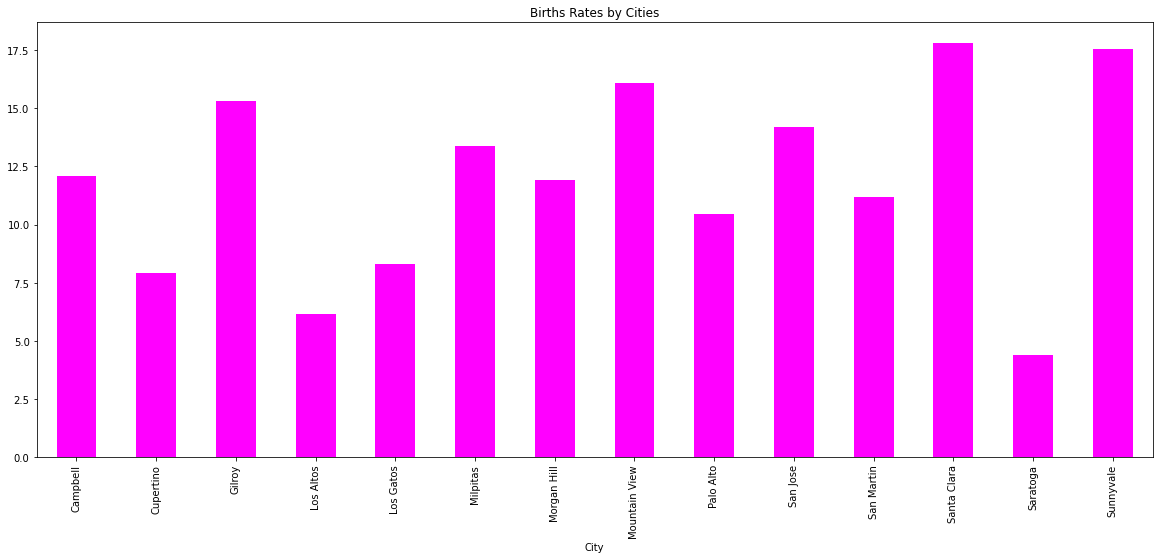

In [296]:
# Compare Birth Reates by cities
data.groupby("City")['birth'].mean().plot(kind='bar',figsize=(20,8), title="Births Rates by Cities", color='magenta')

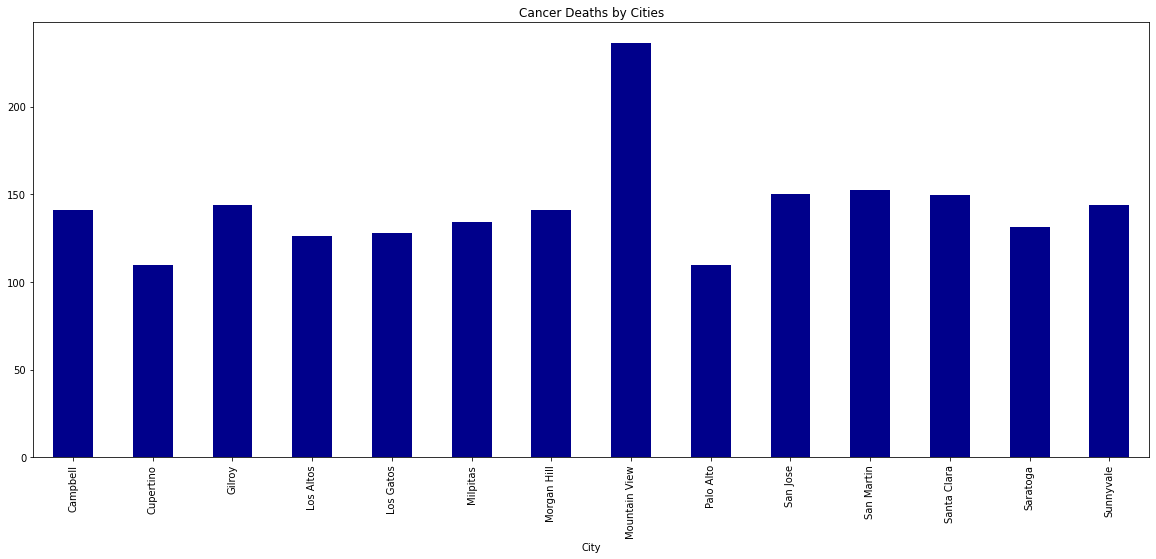

In [297]:
data.groupby("City")['cancer_mort'].mean().plot(kind='bar',figsize=(20,8), title="Cancer Deaths by Cities", color='darkblue')

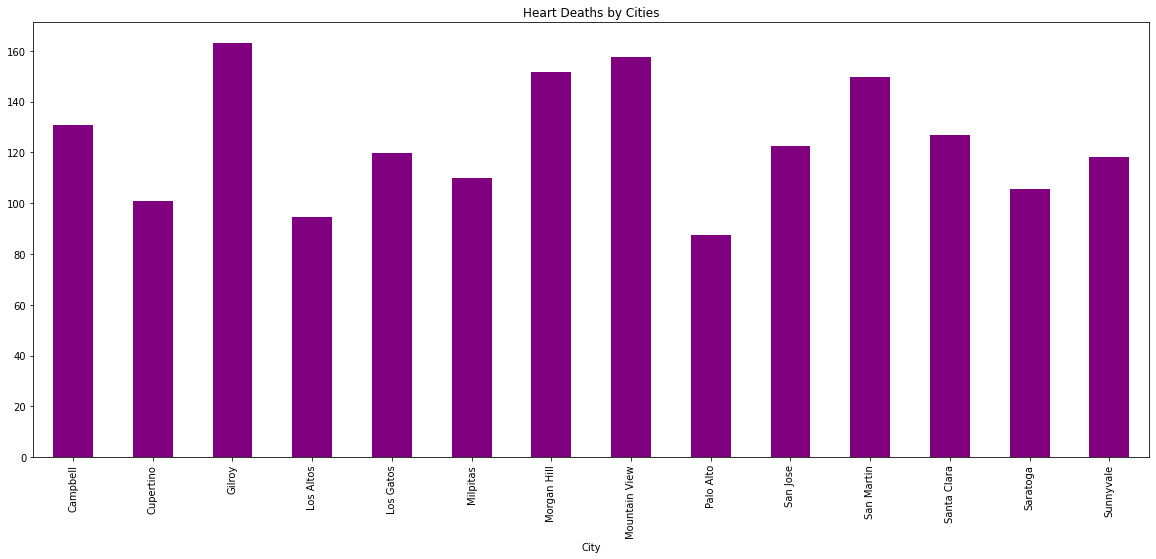

In [298]:
data.groupby("City")['heart_mort'].mean().plot(kind='bar',figsize=(20,8), title="Heart Deaths by Cities", color='purple')

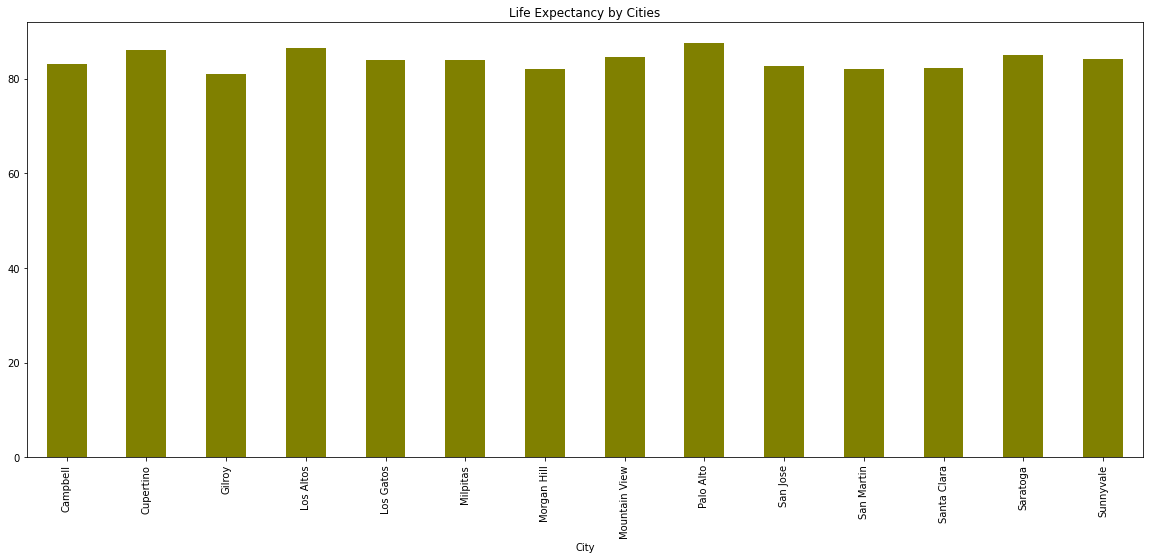

In [301]:
# Life Expectancy Rates by Cities
data.groupby("City")['life'].mean().plot(kind='bar',figsize=(20,8), title="Life Expectancy by Cities", color='olive')

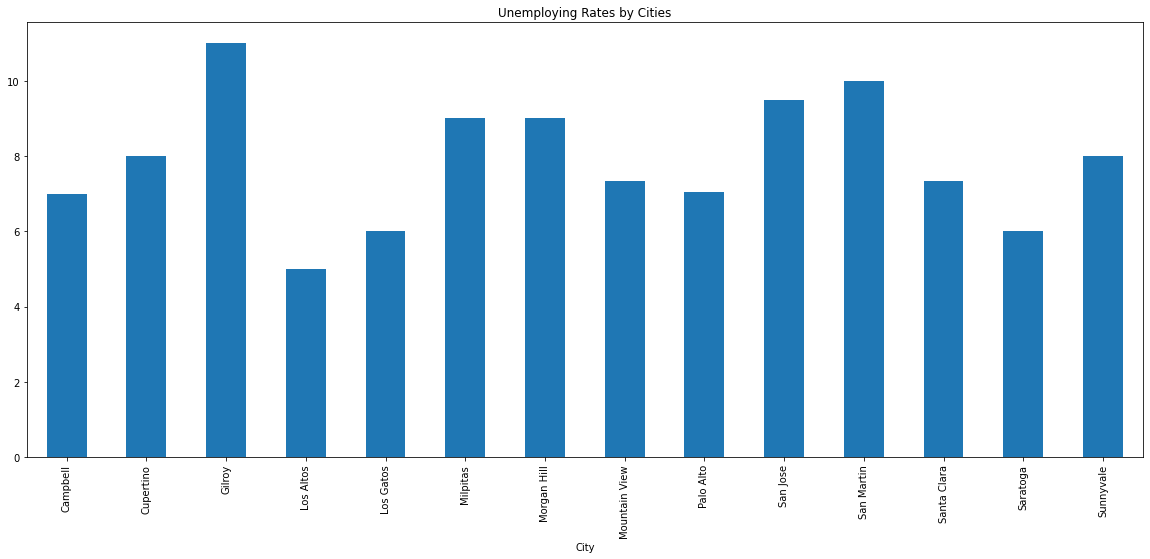

In [302]:
# Unemploying numbers by cities
data.groupby("City")['unemp'].mean().plot(kind='bar',figsize=(20,8), title="Unemploying Rates by Cities")

[Text(0.5, 1.0, 'Median Income and Unemployment Rates by Cities')]

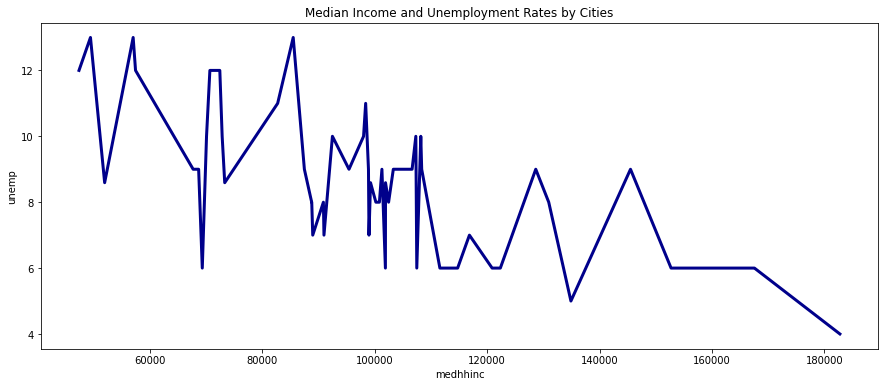

In [303]:
# Compare median income and unemployment rates by cities
import seaborn as sns
plt.figure(figsize=(15,6))
sns.lineplot(data=data, y="unemp", x="medhhinc",color="darkblue",linewidth=3).set(title="Median Income and Unemployment Rates by Cities")

[Text(0.5, 1.0, 'Unemployement rate by College graduation')]

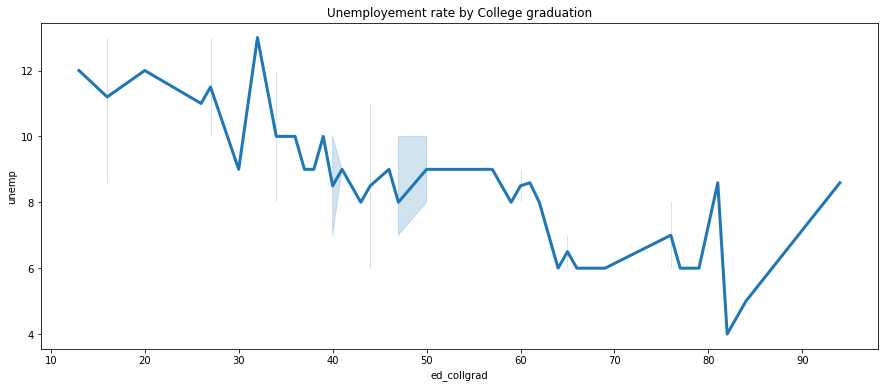

In [304]:
#Unemployement rate by College graduation
plt.figure(figsize=(15,6))
sns.lineplot(data=data, x="ed_collgrad", y="unemp",palette="BuPu",linewidth=3).set(title='Unemployement rate by College graduation')

[Text(0.5, 1.0, 'Unemployement Rates by Having Less Than High School Education')]

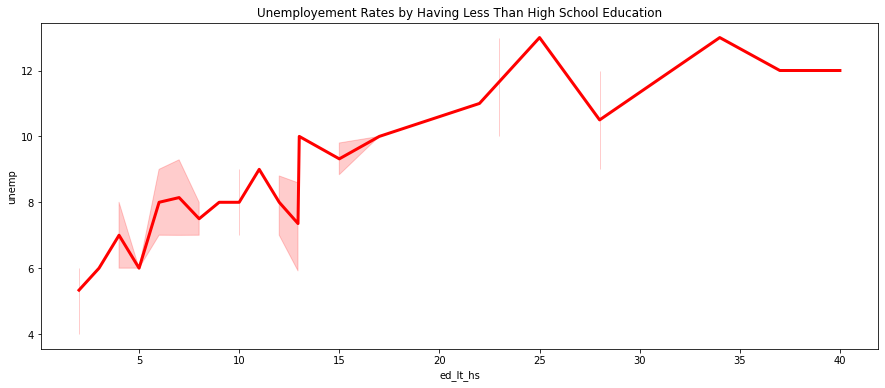

In [305]:
# Unemployment Rate by Having Less than High School Education
plt.figure(figsize=(15,6))
sns.lineplot(data=data, x="ed_lt_hs", y="unemp",color='red',linewidth=3).set(title="Unemployement Rates by Having Less Than High School Education")

[Text(0.5, 1.0, 'Compare Crime Reports & Number of tobocco retail outlets per square')]

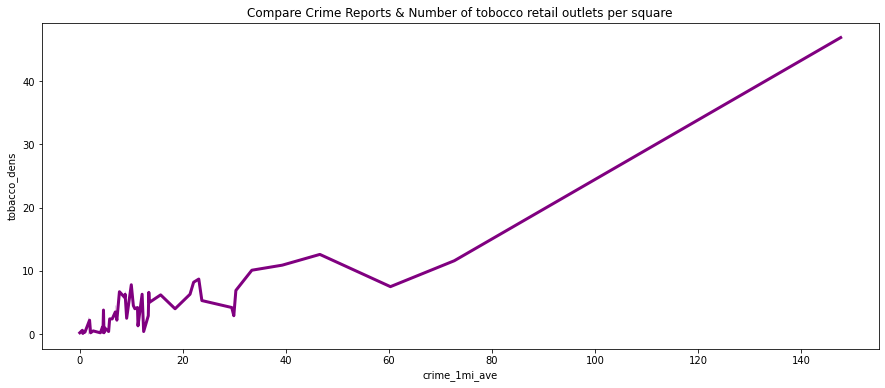

In [306]:
# Display Crime Reports & Number of tobocco retail outlets per square"

plt.figure(figsize=(15,6))
sns.lineplot(data=data, x="crime_1mi_ave", y="tobacco_dens",color="purple",linewidth=3).set(title='Compare Crime Reports & Number of tobocco retail outlets per square')

[Text(0.5, 1.0, 'Compare Crime Reports & Number of alchohol retail outlets per square')]

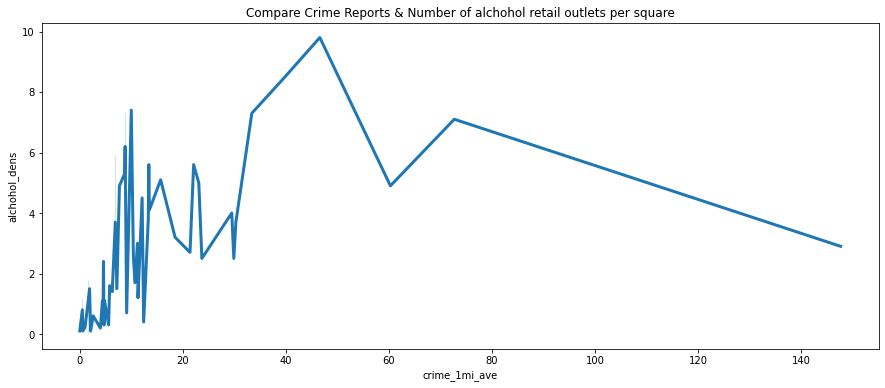

In [307]:
# Display Crime Reports & Number of alchohol retail outlets per square"

plt.figure(figsize=(15,6))
sns.lineplot(data=data, x="crime_1mi_ave", y="alchohol_dens",palette="BuPu",linewidth=3).set(title='Compare Crime Reports & Number of alchohol retail outlets per square')

[Text(0.5, 1.0, 'Number of Speaks a language other than English at home')]

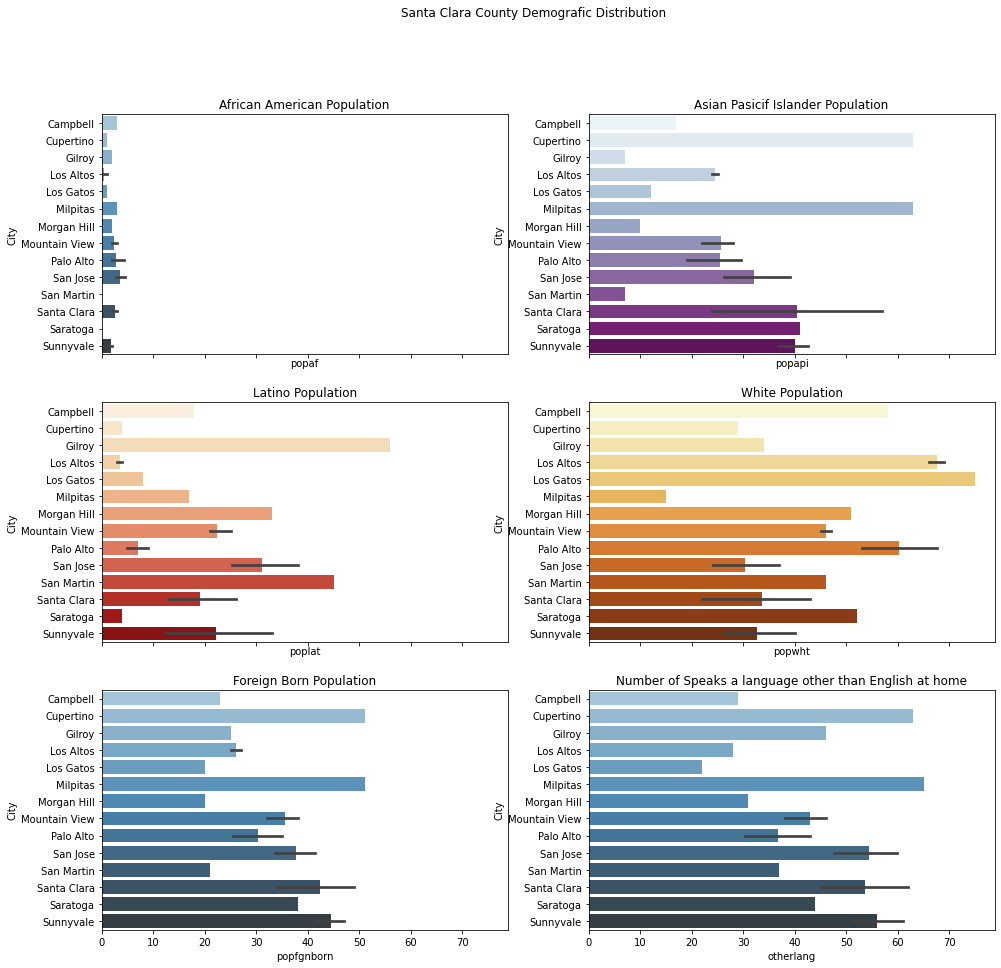

In [308]:
# Display Santa Clara County Demografic Distribution bt Ethnicity
fig, axes = plt.subplots(3,2, sharex=True, figsize=(16,15))
fig.suptitle('Santa Clara County Demografic Distribution')
sns.barplot(x="popaf",y="City",data=data,ax=axes[0,0],palette="Blues_d").set(title='African American Population')
sns.barplot(x='popapi', y='City',data=data,ax=axes[0,1],palette="BuPu").set(title='Asian Pasicif Islander Population')
sns.barplot(x='poplat', y='City',data=data,ax=axes[1,0],palette='OrRd').set(title='Latino Population')
sns.barplot(x='popwht', y='City',data=data,ax=axes[1,1],palette='YlOrBr').set(title='White Population')
sns.barplot(x='popfgnborn' ,y='City', data=data,ax=axes[2,0],palette='Blues_d').set(title='Foreign Born Population')
sns.barplot(x='otherlang' ,y='City',data=data,ax=axes[2,1],palette='Blues_d').set(title='Number of Speaks a language other than English at home')
 

[Text(0.5, 1.0, ' Senior Population Distribution by Cities')]

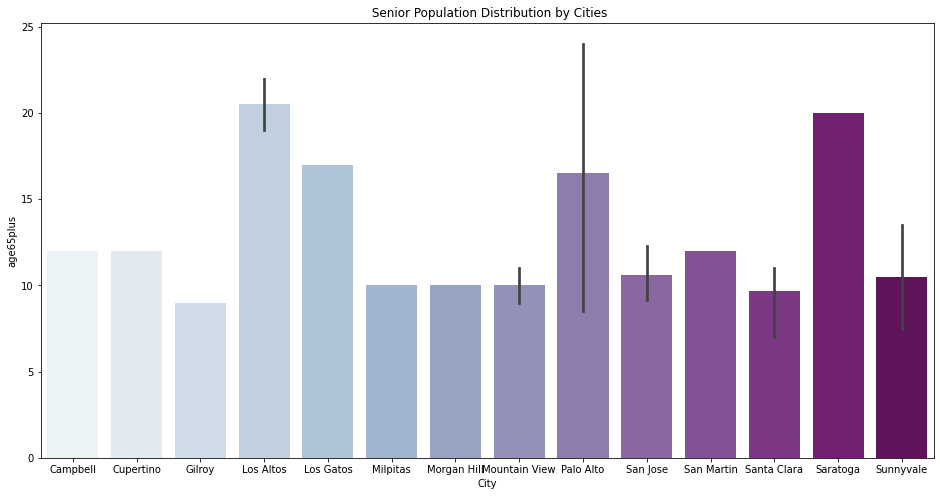

In [309]:
# Santa Clara County Senior Age Population Distribution
plt.figure(figsize=(16,8))
sns.barplot(data=data, x="City", y="age65plus",palette="BuPu",linewidth=3).set(title=' Senior Population Distribution by Cities')

[Text(0.5, 1.0, 'Under 18 Years old Population Distribution')]

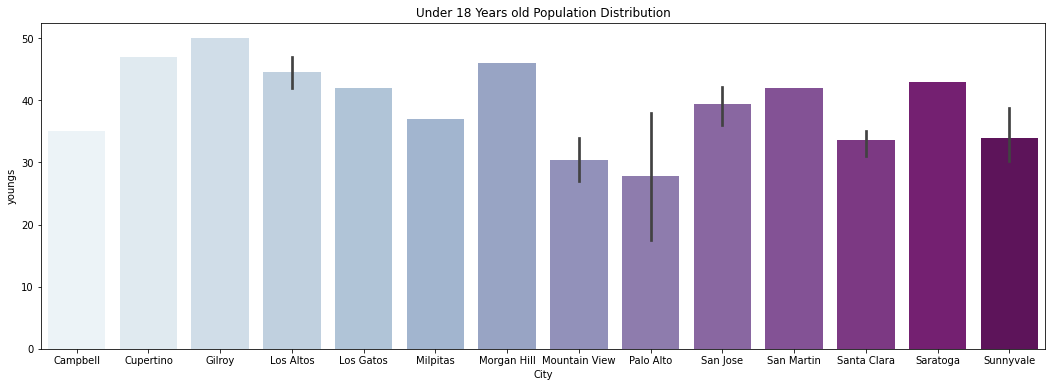

In [310]:
# Santa Clara County Under 18 Ages population  Distribution
data["youngs"]=data[['age0_17','age6_11','age12_17']].sum(axis=1)
plt.figure(figsize=(18,6))
sns.barplot(data=data, x="City", y="youngs",palette="BuPu",linewidth=3).set(title='Under 18 Years old Population Distribution')

[Text(0.5, 1.0, 'Speaking Other Language than English')]

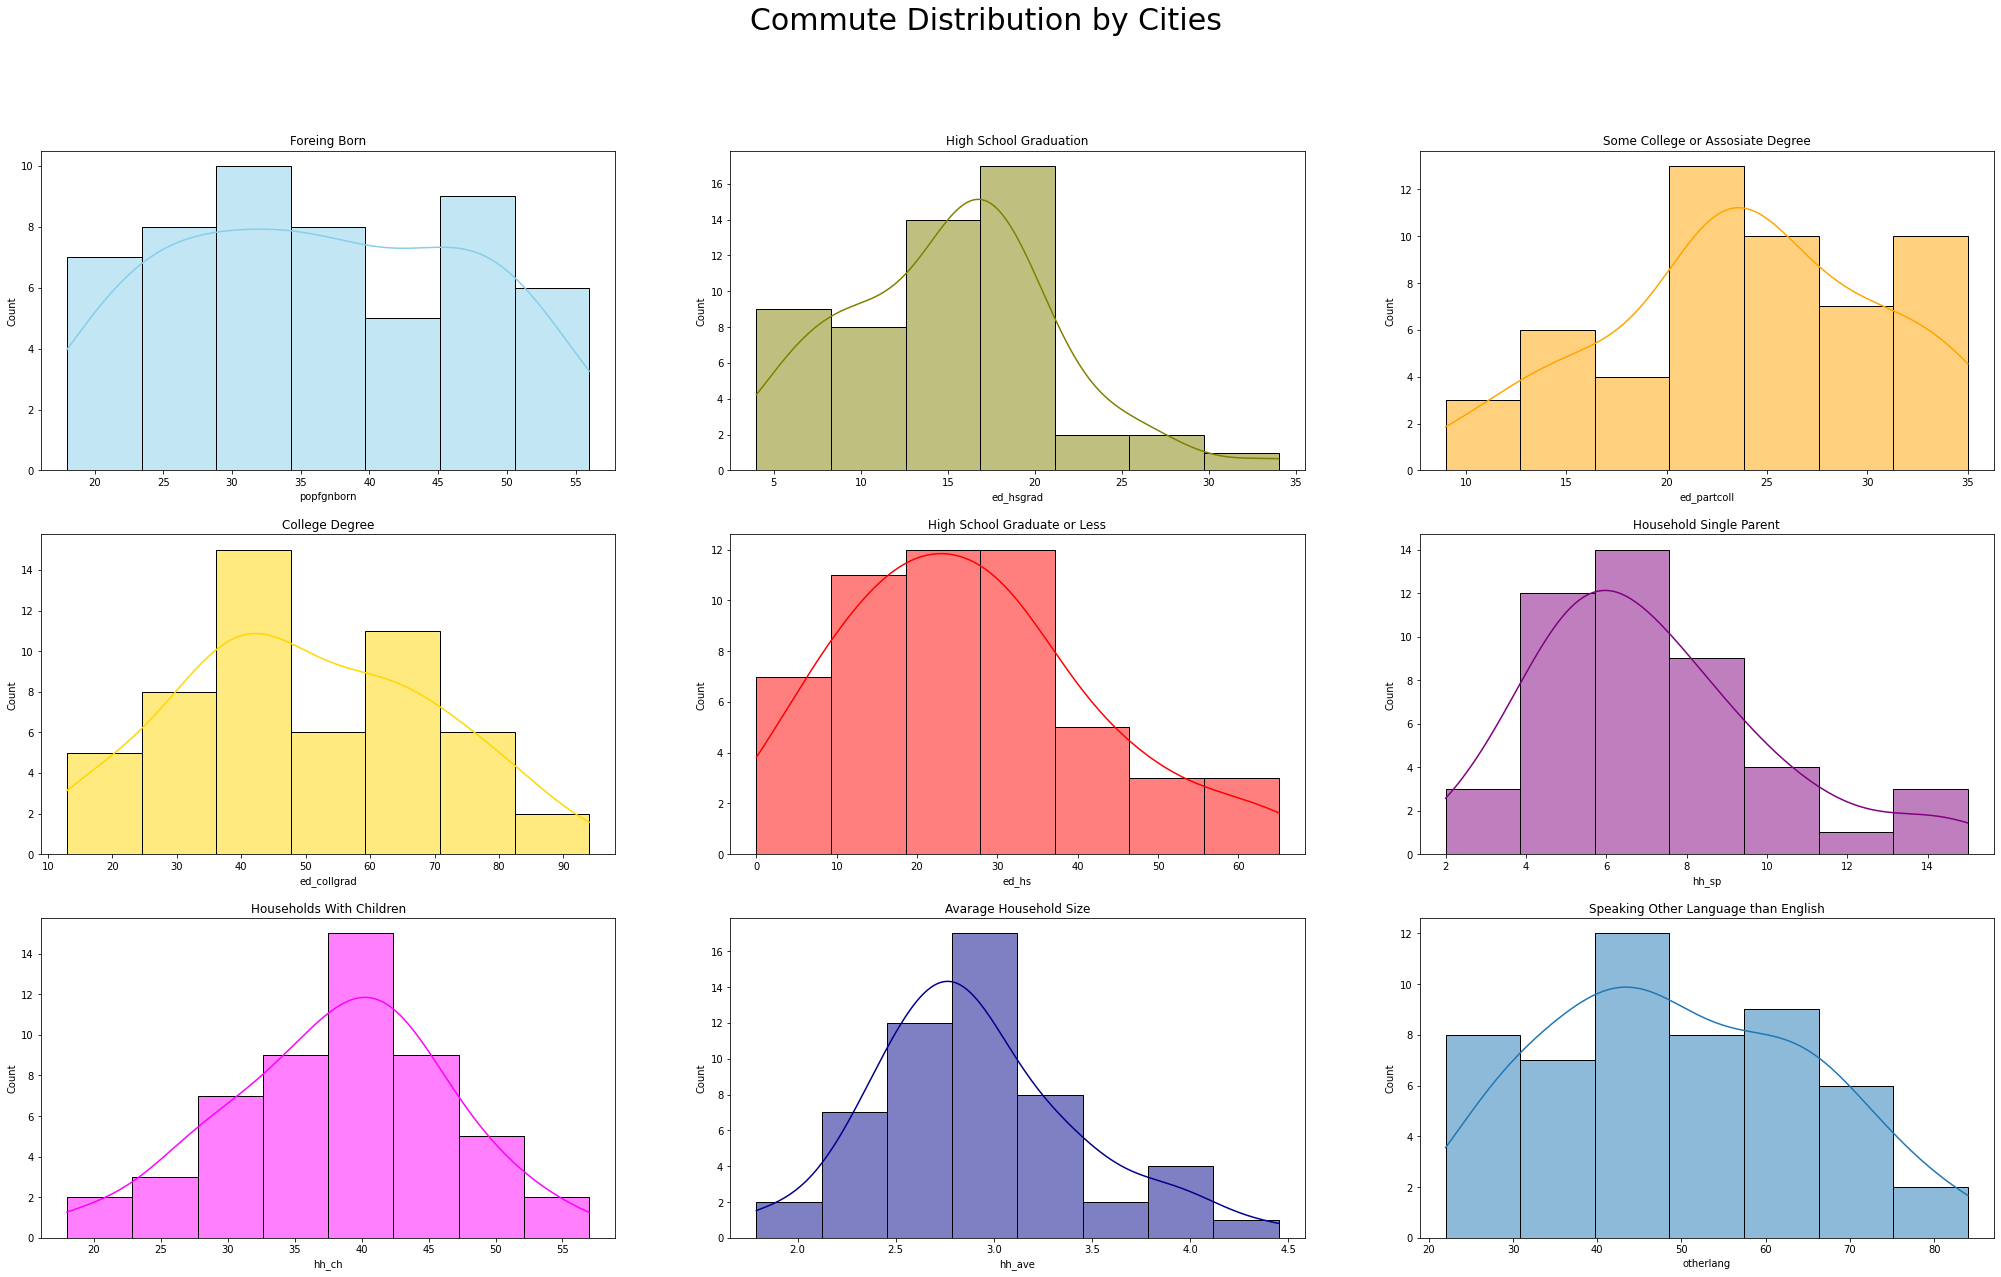

In [311]:
# Santa Clara County Demografic Distribution
fig, axes = plt.subplots(3, 3, figsize=(35, 20))
fig.suptitle('Commute Distribution by Cities',fontsize=30)

sns.histplot(ax=axes[0, 0], data=data, x='popfgnborn',color="skyblue",kde=True,linewidth=1).set(title='Foreing Born')
sns.histplot(ax=axes[0, 1], data=data, x='ed_hsgrad',color="olive",kde=True,linewidth=1).set(title='High School Graduation')
sns.histplot(ax=axes[0, 2], data=data, x='ed_partcoll',color="orange",kde=True,linewidth=1).set(title='Some College or Assosiate Degree')
sns.histplot(ax=axes[1, 0], data=data, x='ed_collgrad',color="gold",kde=True,linewidth=1).set(title='College Degree')
sns.histplot(ax=axes[1, 1], data=data, x='ed_hs',color="red",kde=True,linewidth=1).set(title='High School Graduate or Less')
sns.histplot(ax=axes[1, 2], data=data, x='hh_sp',color="purple",kde=True,linewidth=1).set(title='Household Single Parent')
sns.histplot(ax=axes[2, 0], data=data, x='hh_ch',color="magenta",kde=True,linewidth=1).set(title='Households With Children')
sns.histplot(ax=axes[2, 1], data=data, x='hh_ave',color="darkblue",kde=True,linewidth=1).set(title='Avarage Household Size')
sns.histplot(ax=axes[2, 2], data=data, x='otherlang',palette="green",kde=True,linewidth=1).set(title='Speaking Other Language than English')


[Text(0.5, 1.0, ' Households with gross rent 30% or more of household income')]

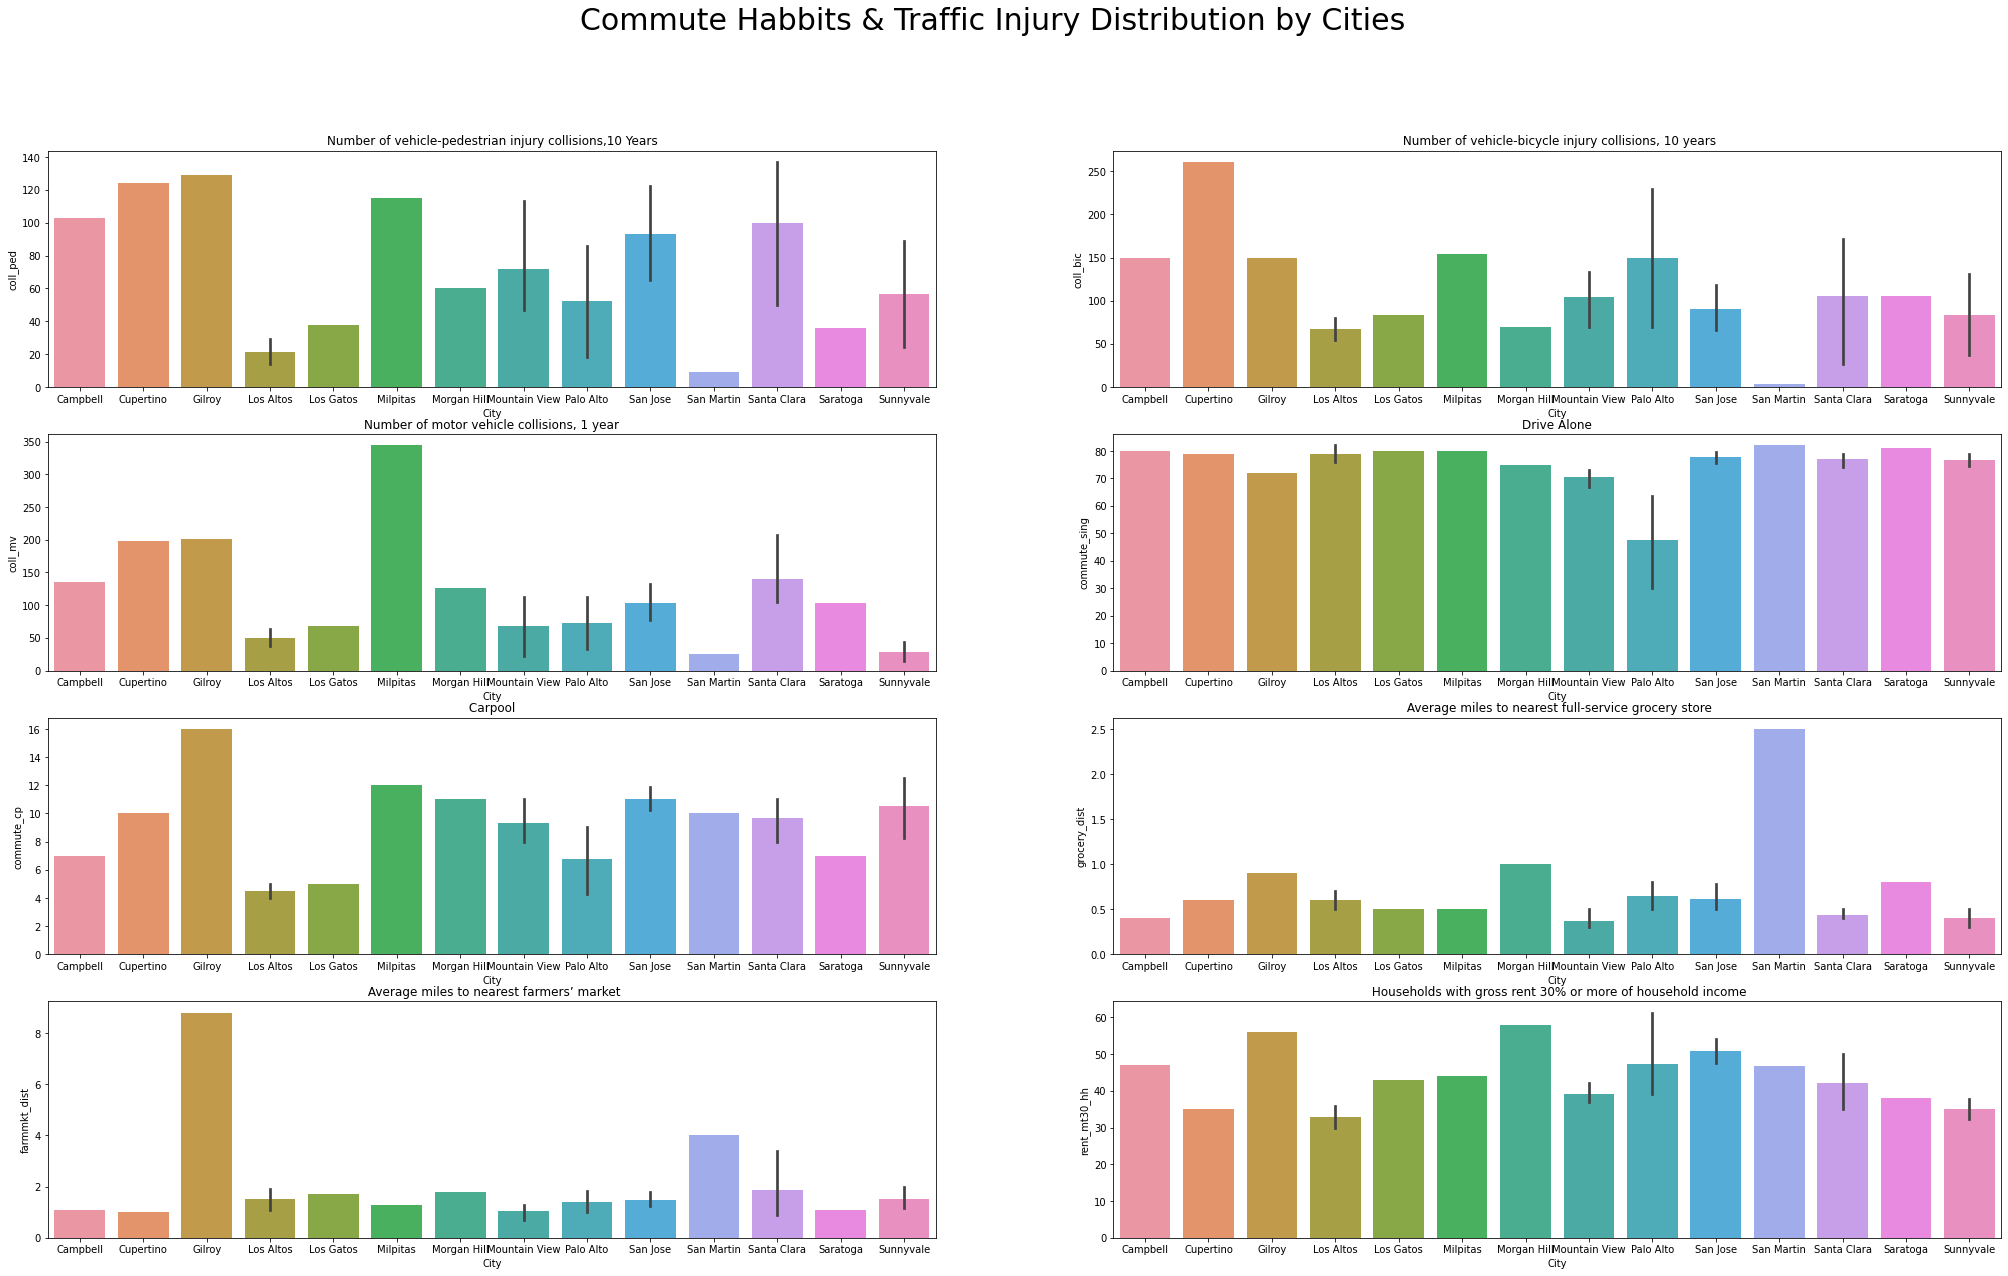

In [312]:
#Santa Clara County Commute Habits  Distribution
fig, axes = plt.subplots(4, 2, figsize=(35, 20))

fig.suptitle('Commute Habbits & Traffic Injury Distribution by Cities',fontsize=30)

sns.barplot(ax=axes[0, 0], data=data, x='City', y='coll_ped').set(title='Number of vehicle-pedestrian injury collisions,10 Years')
sns.barplot(ax=axes[0, 1], data=data, x='City', y='coll_bic').set(title=' Number of vehicle-bicycle injury collisions, 10 years')
sns.barplot(ax=axes[1, 0], data=data, x='City', y='coll_mv').set(title='Number of motor vehicle collisions, 1 year')
sns.barplot(ax=axes[1, 1], data=data, x='City', y='commute_sing').set(title='Drive Alone')
sns.barplot(ax=axes[2, 0], data=data, x='City', y='commute_cp').set(title=' Carpool ')
sns.barplot(ax=axes[2, 1], data=data, x='City', y='grocery_dist').set(title=' Average miles to nearest full-service grocery store')
sns.barplot(ax=axes[3, 0], data=data, x='City', y='farmmkt_dist').set(title=' Average miles to nearest farmers’ market')
sns.barplot(ax=axes[3, 1], data=data, x='City', y='rent_mt30_hh').set(title=' Households with gross rent 30% or more of household income')




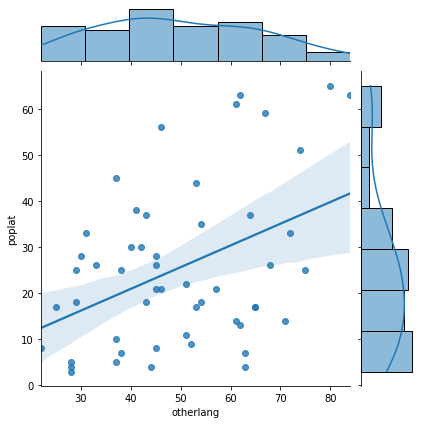

In [314]:
#Latino & Speaks Other Language than Englis 
sns.jointplot(data=data, y="poplat", x="otherlang",kind="reg")

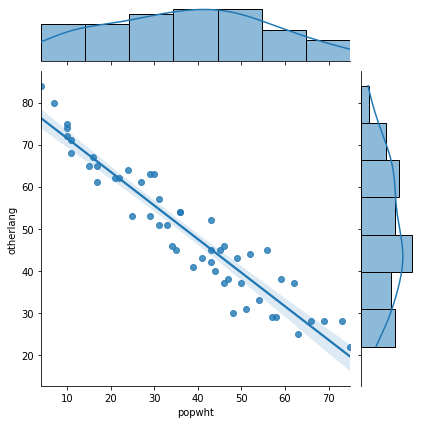

In [315]:
#White & Speaks Other Language than English

sns.jointplot(data=data, x="popwht", y="otherlang",kind="reg")

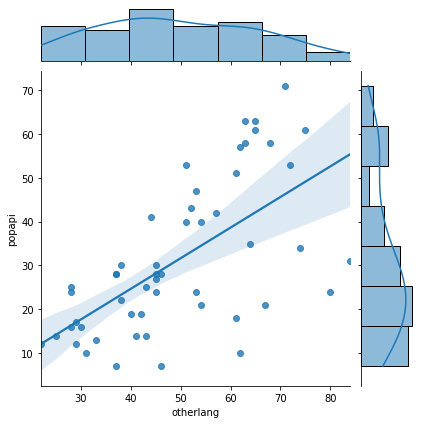

In [233]:
# Asian-Pacific Islander & Speaks Other Language than English 

sns.jointplot(data=data, y="popapi", x="otherlang",kind="reg")

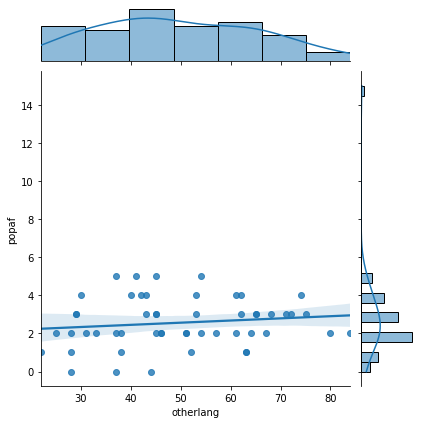

In [234]:
#African American & Speaks Other Language than English

sns.jointplot(ax=axes[1, 1],data=data, y="popaf", x="otherlang",kind="reg")

# *** Findings: ***

   

*     Santa Clara and Sunnyvale cities have the most birth rates numbers
*   Death of cancer disease numbers higher in Mountain View than the other cities. Death from heart dies rates prety clause all cities but Mountain View still has more number.
*    Unemployement numbers decrase by education years. 
*    Avarage age for life expectancy is 83 and all cities life expectancy age is 80 and higher.
*   Unemployement numbers decrase in higher median income.  

*   African American community pretty low than the other ethnicities.
 
*   Having more tobocco stores destination obviously have more crime reports. Alchohol stores density doesn't show similar correlation. 
*     Los Altos, Palo Alto and Saratoga have the most number of senior age population.

*  Many people drive alone but some drivers from Gilroy and Milpitas cities use carpol.
*    Speak other languages than English is common except African American communities.



